# STAT3612 Lecture 4 - Basis Expansion

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3612 Data Mining](http://www.statsoft.org/teaching/stat3612/)

18 February 2019

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

def ffun(x):
    return np.exp(-(x-3)**2)

x = np.arange(0.1, 4.0, 0.1)
np.random.seed(2019)
y = ffun(x) + 0.1*np.random.normal(0, 1, len(x))

plt.figure(1, figsize=(10, 6))
plt.plot(x, y, 'o')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Observational Data', fontsize=15, fontweight="bold")
plt.show()

<Figure size 1000x600 with 1 Axes>

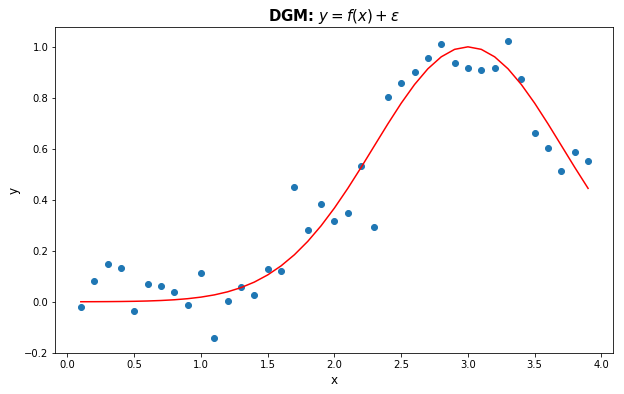

In [2]:
plt.figure(1, figsize=(10, 6))
plt.plot(x, y, 'o')
plt.plot(x, ffun(x), color="red")
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('DGM: $y=f(x)+\epsilon$', fontsize=15, fontweight="bold")
plt.show()

# Polynomial Regression

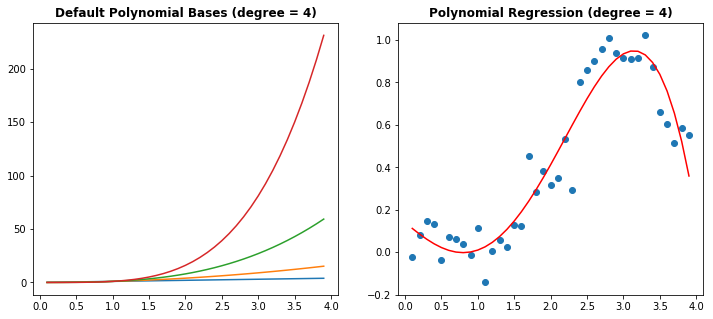

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

PolyBasis = PolynomialFeatures(degree=4, include_bias=False)
xphi = PolyBasis.fit_transform(x.reshape([-1,1]))
linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Default Polynomial Bases (degree = 4)', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Polynomial Regression (degree = 4)', fontweight="bold")
plt.show()

In [4]:
np.corrcoef(xphi.transpose()).round(4)

array([[1.    , 0.9698, 0.9192, 0.8694],
       [0.9698, 1.    , 0.9862, 0.9588],
       [0.9192, 0.9862, 1.    , 0.9922],
       [0.8694, 0.9588, 0.9922, 1.    ]])

In [5]:
np.matmul(xphi.transpose(), xphi).round(4)

array([[2.05400000e+02, 6.08400000e+02, 1.92213320e+03, 6.32533200e+03],
       [6.08400000e+02, 1.92213320e+03, 6.32533200e+03, 2.14089036e+04],
       [1.92213320e+03, 6.32533200e+03, 2.14089036e+04, 7.39668587e+04],
       [6.32533200e+03, 2.14089036e+04, 7.39668587e+04, 2.59594900e+05]])

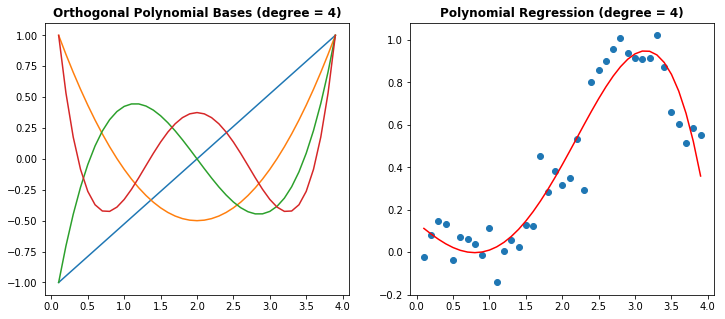

In [6]:
from sympy import *

order = 4
xphi = np.zeros((x.shape[0], order))
x0 = np.linspace(-1, 1, x.shape[0])
for j in range(order):
    xphi[:,j] = [legendre(j+1,x1) for x1 in x0]

linreg = LinearRegression()
linreg.fit(xphi, y)
yfit = linreg.predict(xphi)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(x, xphi)
axs[0].set_title('Orthogonal Polynomial Bases (degree = 4)', fontweight="bold")
axs[1].plot(x, y, 'o')
axs[1].plot(x, yfit, color="red")
axs[1].set_title('Polynomial Regression (degree = 4)', fontweight="bold")
plt.show()

In [7]:
np.corrcoef(xphi.transpose()).round(4)

array([[ 1.    , -0.    ,  0.1122, -0.    ],
       [-0.    ,  1.    , -0.    ,  0.1595],
       [ 0.1122, -0.    ,  1.    , -0.    ],
       [-0.    ,  0.1595, -0.    ,  1.    ]])

In [8]:
np.matmul(xphi.transpose(), xphi).round(4)

array([[13.6842, -0.    ,  1.0614, -0.    ],
       [-0.    ,  8.6526, -0.    ,  1.1138],
       [ 1.0614, -0.    ,  6.5336, -0.    ],
       [-0.    ,  1.1138, -0.    ,  5.3965]])

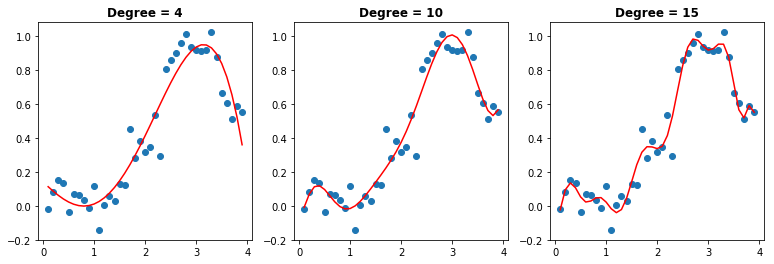

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(13, 4))
x0 = np.linspace(-1, 1, x.shape[0])
order = (4,10,15)
for k in range(len(order)):
    xphi = np.zeros((x.shape[0], order[k]))
    for j in range(order[k]):
        xphi[:,j] = [legendre(j+1,x1) for x1 in x0]
    linreg = LinearRegression()
    linreg.fit(xphi, y)
    yfit = linreg.predict(xphi)
    axs[k].plot(x, y, 'o')
    axs[k].plot(x, yfit, color="red")
    axs[k].set_title('Degree = ' + str(order[k]), fontweight="bold")
plt.show()